<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


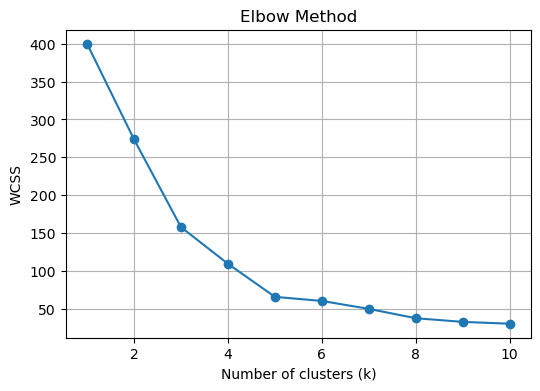

Silhouette Score: 0.5546571631111091


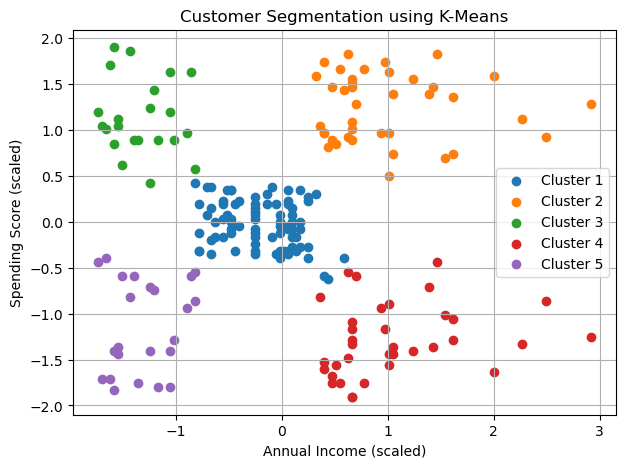

In [3]:
# Step 1: Import libraries
import os
os.environ["OMP_NUM_THREADS"] = "1"

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Step 2: Load dataset
data = pd.read_csv("Mall_customers.csv")
data.info()

# Step 3: Select features
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Step 4: Feature scaling
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

# Step 5: Find optimal k using Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scale)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

# Step 6: Apply K-Means with optimal k
k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
labels = kmeans.fit_predict(X_scale)

# Step 7: Silhouette score
score = silhouette_score(X_scale, labels)
print("Silhouette Score:", score)

# Step 8: Visualize clusters
plt.figure(figsize=(7, 5))
for i in range(k):
    plt.scatter(
        X_scale[labels == i, 0],
        X_scale[labels == i, 1],
        label=f'Cluster {i+1}'
    )

plt.title("Customer Segmentation using K-Means")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend()
plt.grid(True)
plt.show()
